# Estymacja parametrów rozkładów ciągłych

### Statystyczna analiza danych
**dr inż. Wojciech Artichowicz**

**Katedra Geotechniki i Inżynierii Wodnej PG**

W pracy z danymi jednym z kluczowych zagadnień jest estymacja parametrów rozkładu. Jeśli możemy podejrzewać, że dane pochodzą z pewnego teoretycznego rozkładu prawdopodobieństwa. W przedstawionym tu przypadku rozważany będzie rozkład normalny, jednak podobne postępowanie można powtórzyć dla dowolnego rozkładu ciągłego.

### Rozkład normalny

Gęstość rozkładu normalnego dana jest wzorem:
$$f(x)=\frac{1}{\sigma \sqrt{2g}}exp \left(-\frac{(x-\mu)^2}{2\sigma^2} \right)$$

Parametrami rozkładu normalnego są $\mu$ i $\sigma$. Wartości te należy oszacować na podstawie danych.

#### Dane
Dane są pomiary* wartości stężenia tlenu w wodzie (plik: `tlen.xlsx`). Zakładając, że wartości podlegają rozkładowi normalnemu wykonać estymację parametrów tego rozkładu. Ocenić, czy dane mogą rzeczywiście pochodzić z populacji o rozkładzie normalnym. Ponadto obliczyć średnią, medianę i odchylenie z próby wraz z przedziałami ufności.

*) Dane zostały wygenerowane z użyciem liczb pseudolosowych

### Import bibliotek języka Python

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

#### Wczytanie danych
Do wczytania danych z pliku MS Excel najwygodniej jest użyć biblioteki [`pandas`](https://pandas.pydata.org/), która pozwala wczytać dane bezpośrednio do ramki danych (*ang.* data frame). Poniższy kod wczytuje dane i umieszcza je w ramce danych o nazwie `df`.

In [2]:
df = pd.read_excel("tlen.xlsx")
df

,tlen
0,8.515
1,7.808
2,7.500
3,8.018
4,8.445
...,...
95,7.841
96,8.616
97,8.364
98,8.196


W tym przypadku, w celu dalszego przetwarzania wczytanych wartości wygodnie jest użyć danych w postaci tablicy numpy.

In [3]:
dane = df["tlen"].to_numpy()
dane

array([8.515, 7.808, 7.5  , 8.018, 8.445, 8.993, 8.099, 6.776, 8.547,
       7.794, 8.631, 7.282, 8.523, 7.608, 8.294, 7.519, 7.042, 7.819,
       8.022, 6.97 , 8.316, 8.155, 8.501, 8.226, 7.952, 7.803, 8.254,
       8.128, 8.51 , 7.756, 7.397, 8.304, 7.37 , 8.343, 8.115, 8.726,
       7.552, 8.177, 7.541, 7.745, 7.413, 8.724, 7.092, 7.887, 8.217,
       8.626, 7.94 , 7.869, 8.427, 8.114, 7.81 , 7.951, 8.44 , 8.509,
       8.089, 7.637, 7.059, 7.996, 8.287, 7.289, 8.238, 8.575, 7.736,
       8.281, 7.721, 7.809, 7.796, 8.667, 8.301, 7.62 , 8.123, 7.464,
       8.315, 8.096, 8.696, 7.063, 8.756, 8.257, 8.154, 9.186, 8.144,
       6.988, 7.806, 7.304, 9.12 , 7.924, 7.775, 7.826, 7.574, 7.145,
       8.068, 7.536, 8.841, 7.362, 8.199, 7.841, 8.616, 8.364, 8.196,
       7.846])

### Histogram
Jednym z pierwszych kroków w ocenie rozkładu prawdopodobieństwa jest wykonanie histogramu. Wykonanie histogramu ma sens jeśli próba zawiera odpowiednio dużą liczbę punktów (przynajmniej kilkadziesiąt). Histogram można wykonać korzystając z funkcji [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) biblioteki [`matplotlib`](https://matplotlib.org/).

Jako dane przekazano kolumnę `tlen` ramki danych `df`, którą wcześniej zamieniono na format `numpy array`. Przekazanie wartości argumentu `bins="auto"` oznacza automatyczny dobór liczby kolumn w histogramie. Możliwe jest też przekazanie z góry określonej liczby kolumn np.: `bins=10`. Wartość argumentu `density` ustawiona na `True` oznacza, że histogram ma być wykresem gęstości rozkładu prawdopodobieństwa.

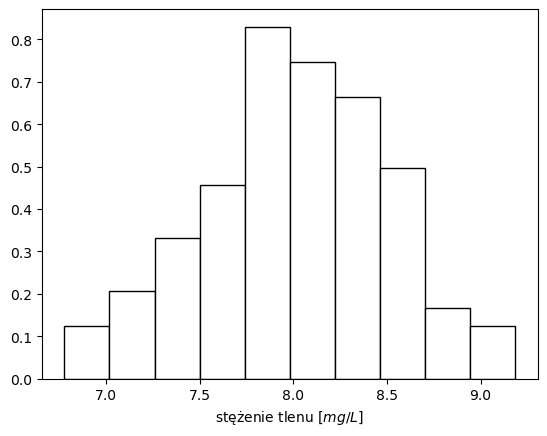

In [4]:
plt.hist(dane,bins="auto",density=True,edgecolor="black",color="white")
plt.xlabel("stężenie tlenu $[mg/L]$")
pass

### Estymacja parametrów rozkładu ciągłego

W celu estymacji parametrów $\mu$ i $\sigma$ rozkładu normalnego wykorzystuje się metodę [`fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html) danego typu rozkładu. Należy wybrać rozkład (tu jest to rozkład normalny `st.norm`) i użyć metody `fit()` przekazując jej jako argument dane, które mają zostać wykorzystane do estymacji.

In [5]:
p = st.norm.fit(dane) # określenie parametrów rozkładu normalnego na podstawie danych
p

(7.99781, 0.5061061686049677)

#### Utworzenie obiektu estymowanej zmiennej losowej 

W celu utworzenia zmiennej losowej rozkładu normalnego z estymowanymi wartościami wartości oczekiwanej i odchylenia standardowego należy wykorzystać funkcję tworzącą dany tym rozkładu. Dodatkowo można tu wykorzystać tzw. operator rozpakowania, dzięki czemu unika się konieczności przekazywania każdego argumentu osobno.

In [6]:
RVe = st.norm(*p) # utworzenie obiektu rozkładu

#### Porównanie gęstości estymowanego rozkładu z histogramem

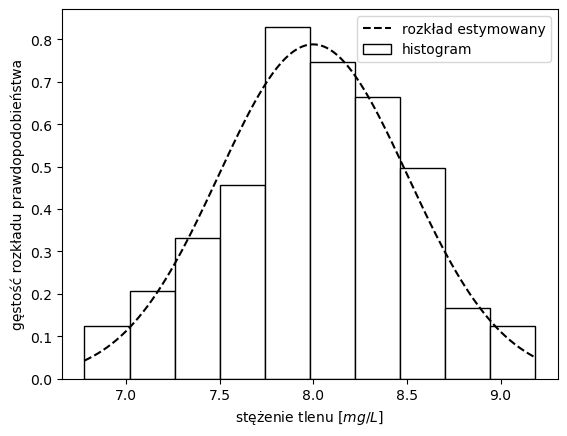

In [7]:
plt.hist(dane,bins="auto",density=True,edgecolor="black",color="white")

x = np.linspace(np.min(dane),np.max(dane),200)
plt.plot(x,RVe.pdf(x),color="black",linestyle='dashed')
plt.legend(["rozkład estymowany","histogram"])
plt.xlabel("stężenie tlenu $[mg/L]$")
plt.ylabel("gęstość rozkładu prawdopodobieństwa")
pass

### Test dopasowania rozkładu

W celu sprawdzenia czy próba rzeczywiście może pochodzić z rozważanego rozkładu można przeprowadzić test Kołmogorowa-Smirnowa. Obliczenia związane z testem realizuje funkcja [`kstest()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest). W celu sprawdzenia czy próba może pochodzić z rozważanego rozkładu przekazuje się do funkcji testującej dwa argumenty: kolumnę danych oraz funkcję opisującą dystrybuantę estymowanego rozkładu. Zwracane są dwie wartości. Istotną wartością jest `pvalue`. Jeśli wartość ta jest mała (umownie: poniżej 0,05) to można uznać, że próba nie pochodzi z rozważanego rozkładu, jeśli wartość ta jest duża (umownie powyżej 0,05) to można uznać, że jest duże prawdopodobieństwo, że próba pochodzi z rozważanego rozkładu.

In [8]:
st.kstest(dane,RVe.cdf)

KstestResult(statistic=0.06149420797338889, pvalue=0.8213043978055151, statistic_location=8.089, statistic_sign=-1)

### Określenie przedziałów ufności

W celu obliczenia przedziałów ufności dla dowolnego parametru można użyć funkcji [`bootstrap()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html#scipy.stats.bootstrap) opartej o metodę bootstrappową. Tak jak w przpadku testów permutacyjnych metoda ta nie wymaga spełnienia właściwie żadnych założeń i umożliwia oszacowanie przedziałów ufności dla dowolnych parametrów.

Funkcja [`bootstrap()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html#scipy.stats.bootstrap) wymaga przekazania wektora danych umieszczonego w krotce tj.: przekazuje się argument w postaci `(dane,)`. Drugim argumentem jest funkcja obliczająca wartość parametru, dla którego ma zostać oszacowany przedział ufności. Parametrem nazwanym `confidence_level` jest wartość ufności, domyślnie jest to wartość $0,95$. Parametr nazwany `vectorized` umożliwia określenie czy obliczenia mają zostać zoptymalizowane pod względem wydajności. Przekazana wartość `vectorized=False` oznacza zaniechanie zwiększenia efektywności obliczeń, dzięki czemu brak jest dodatkowych wymagań co do funkcji obliczającej badany parametr.

Poniżej obliczono kolejno przedziały ufności dla średniej, odchylenia standardowego i mediany. W zwracanym wyniku wartośc określona jako `low` oznacza dolną granicę przedziału ufności, a wartość określona jako `high` górną granicę. Wartość `standard_error` oznacza błąd standardowy oszacowania. 

In [9]:
st.bootstrap((dane,), st.tmean, confidence_level=0.95, vectorized=False)

BootstrapResult(confidence_interval=ConfidenceInterval(low=7.8959100000000015, high=8.094785805527753), bootstrap_distribution=array([8.03522, 7.95232, 8.01779, ..., 7.99444, 8.01967, 7.98418]), standard_error=0.05081936522882505)

In [10]:
st.bootstrap((dane,),st.tstd, confidence_level=0.95, vectorized=False)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.45079207186645326, high=0.5795230183333915), bootstrap_distribution=array([0.48082675, 0.51382375, 0.51310827, ..., 0.46620624, 0.50773904,
       0.54855365]), standard_error=0.032721580305612195)

In [11]:
st.bootstrap((dane,),np.median, confidence_level=0.95, vectorized=False)

BootstrapResult(confidence_interval=ConfidenceInterval(low=7.846, high=8.1525), bootstrap_distribution=array([7.94  , 7.9515, 7.996 , ..., 8.0555, 7.919 , 7.952 ]), standard_error=0.08266779721808111)